In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
# Checking for null values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
data=df[['AT','AP','AH','TEY']]
data.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [10]:
data.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


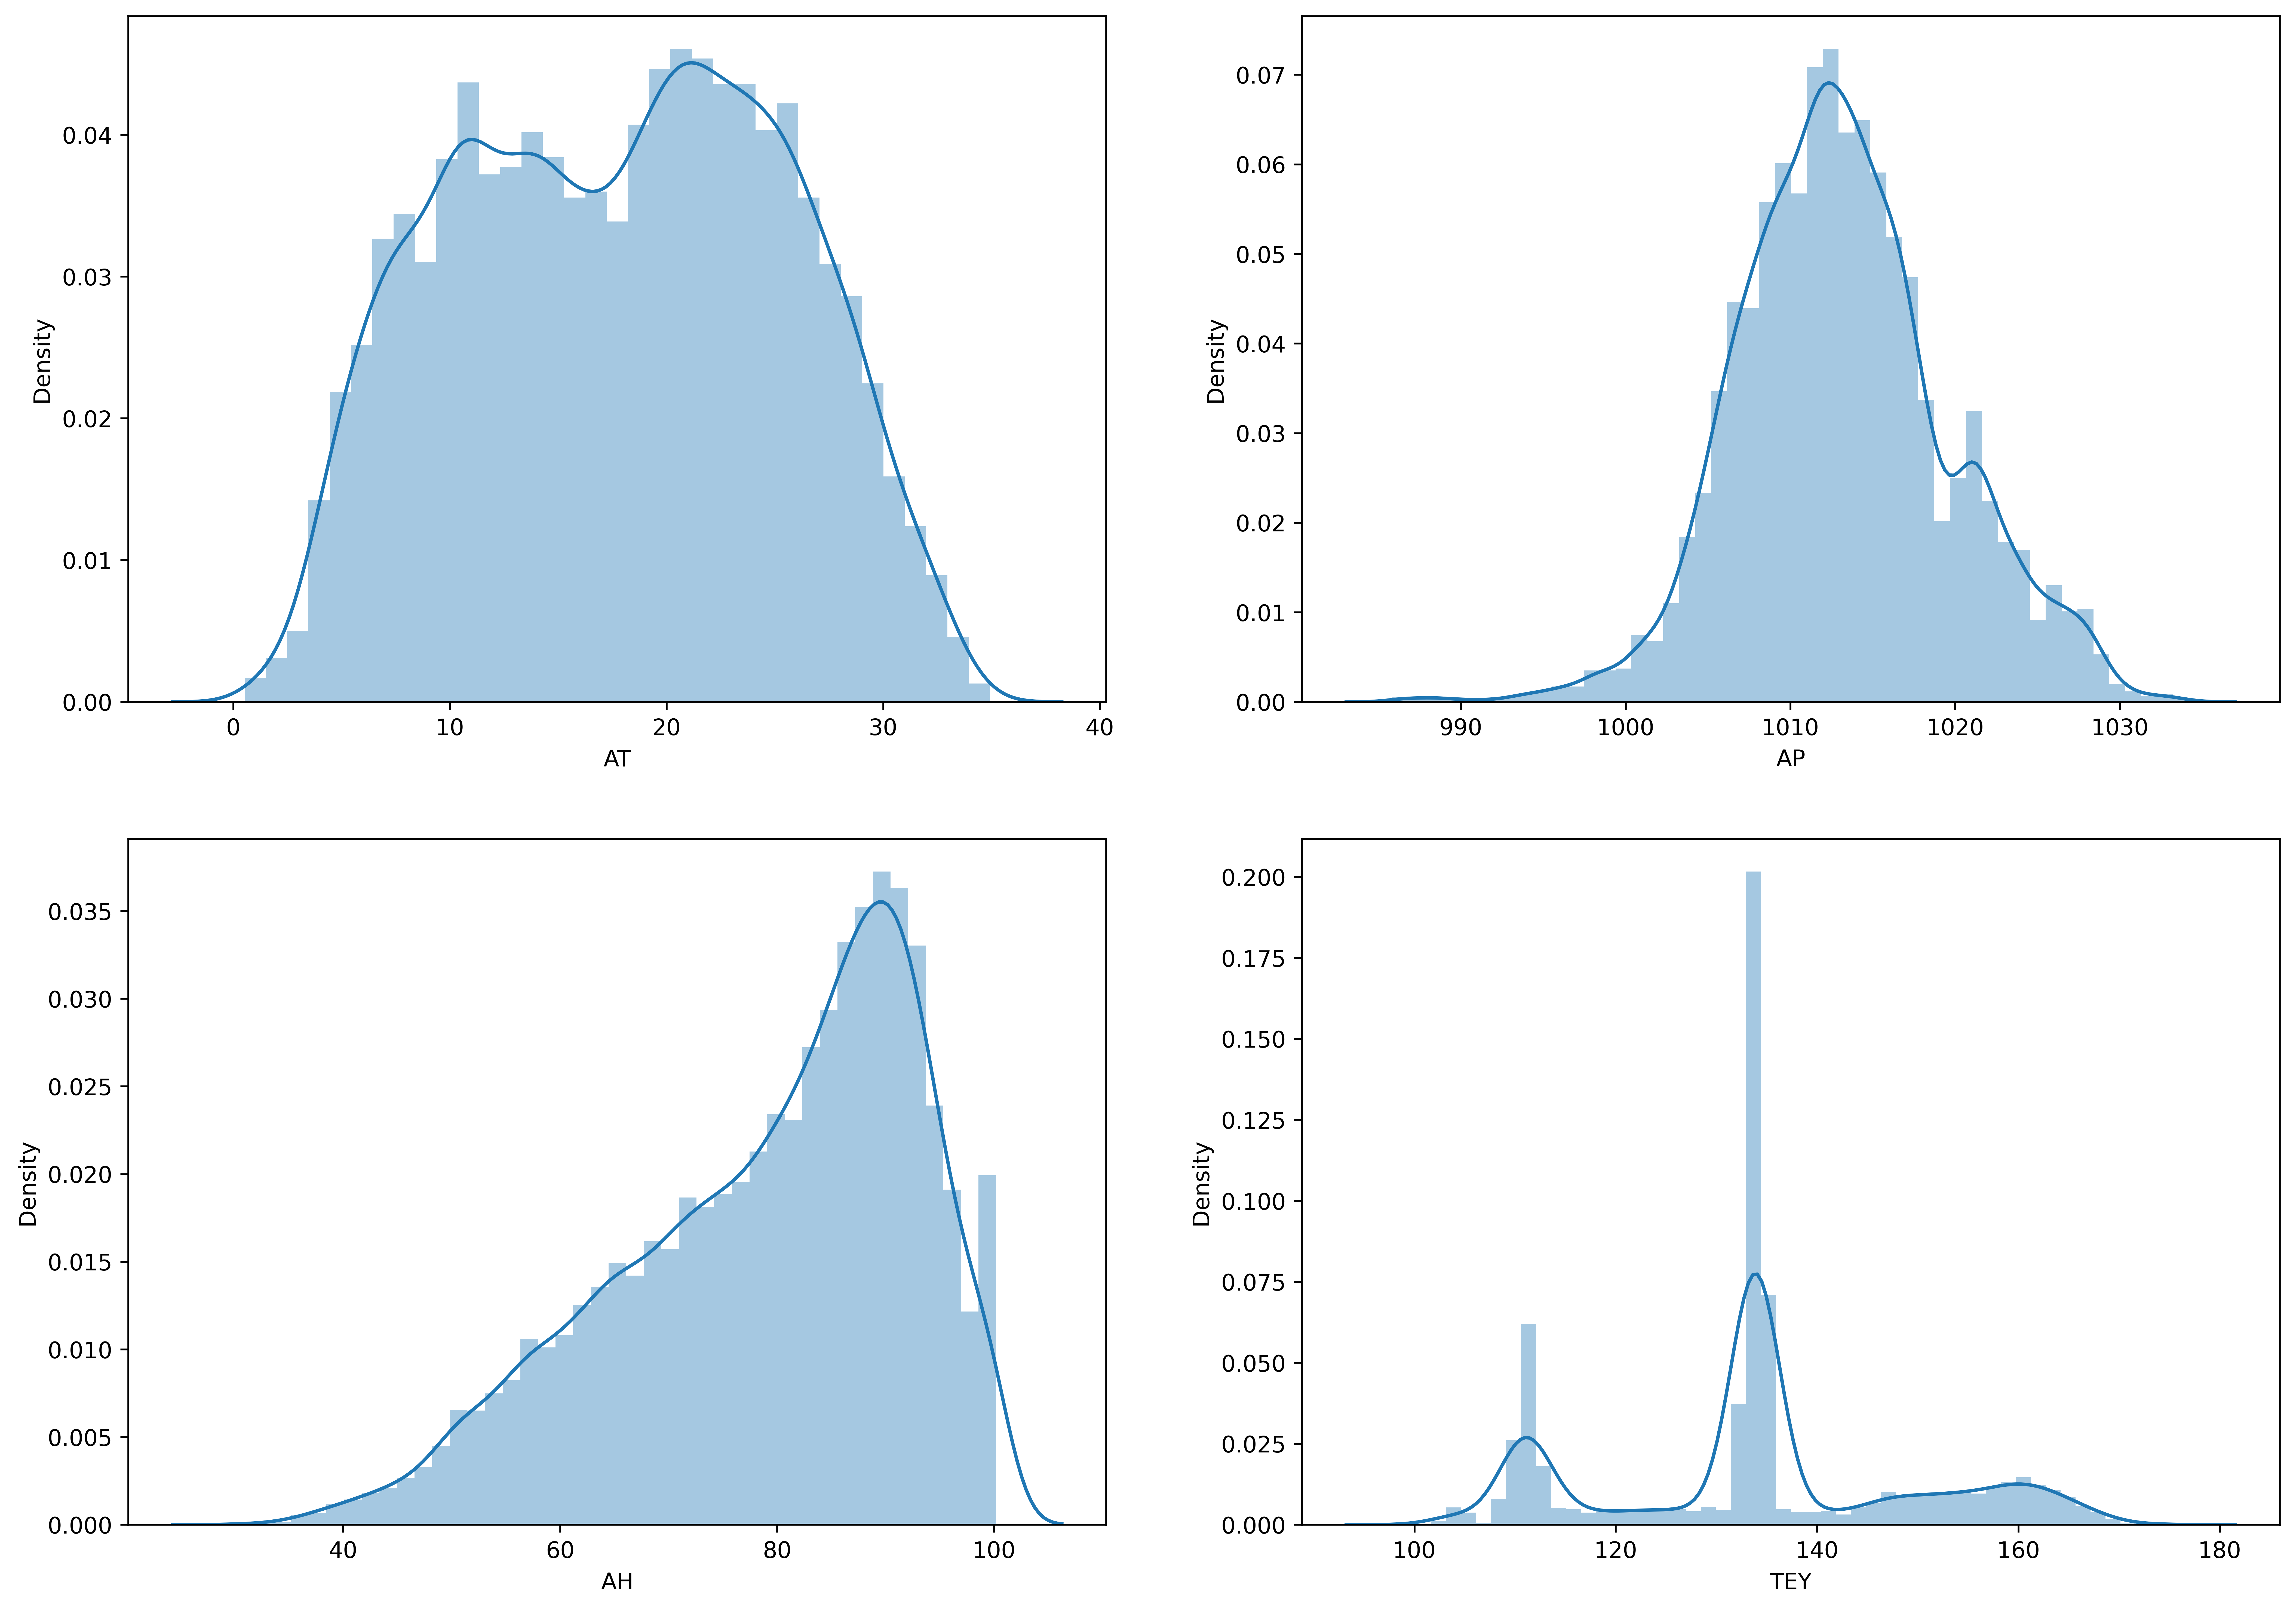

In [11]:
# distplot

fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(data.AT, ax = ax[0,0])
sns.distplot(data.AP, ax = ax[0,1])
sns.distplot(data.AH, ax = ax[1,0])
sns.distplot(data.TEY, ax = ax[1,1])
plt.show()

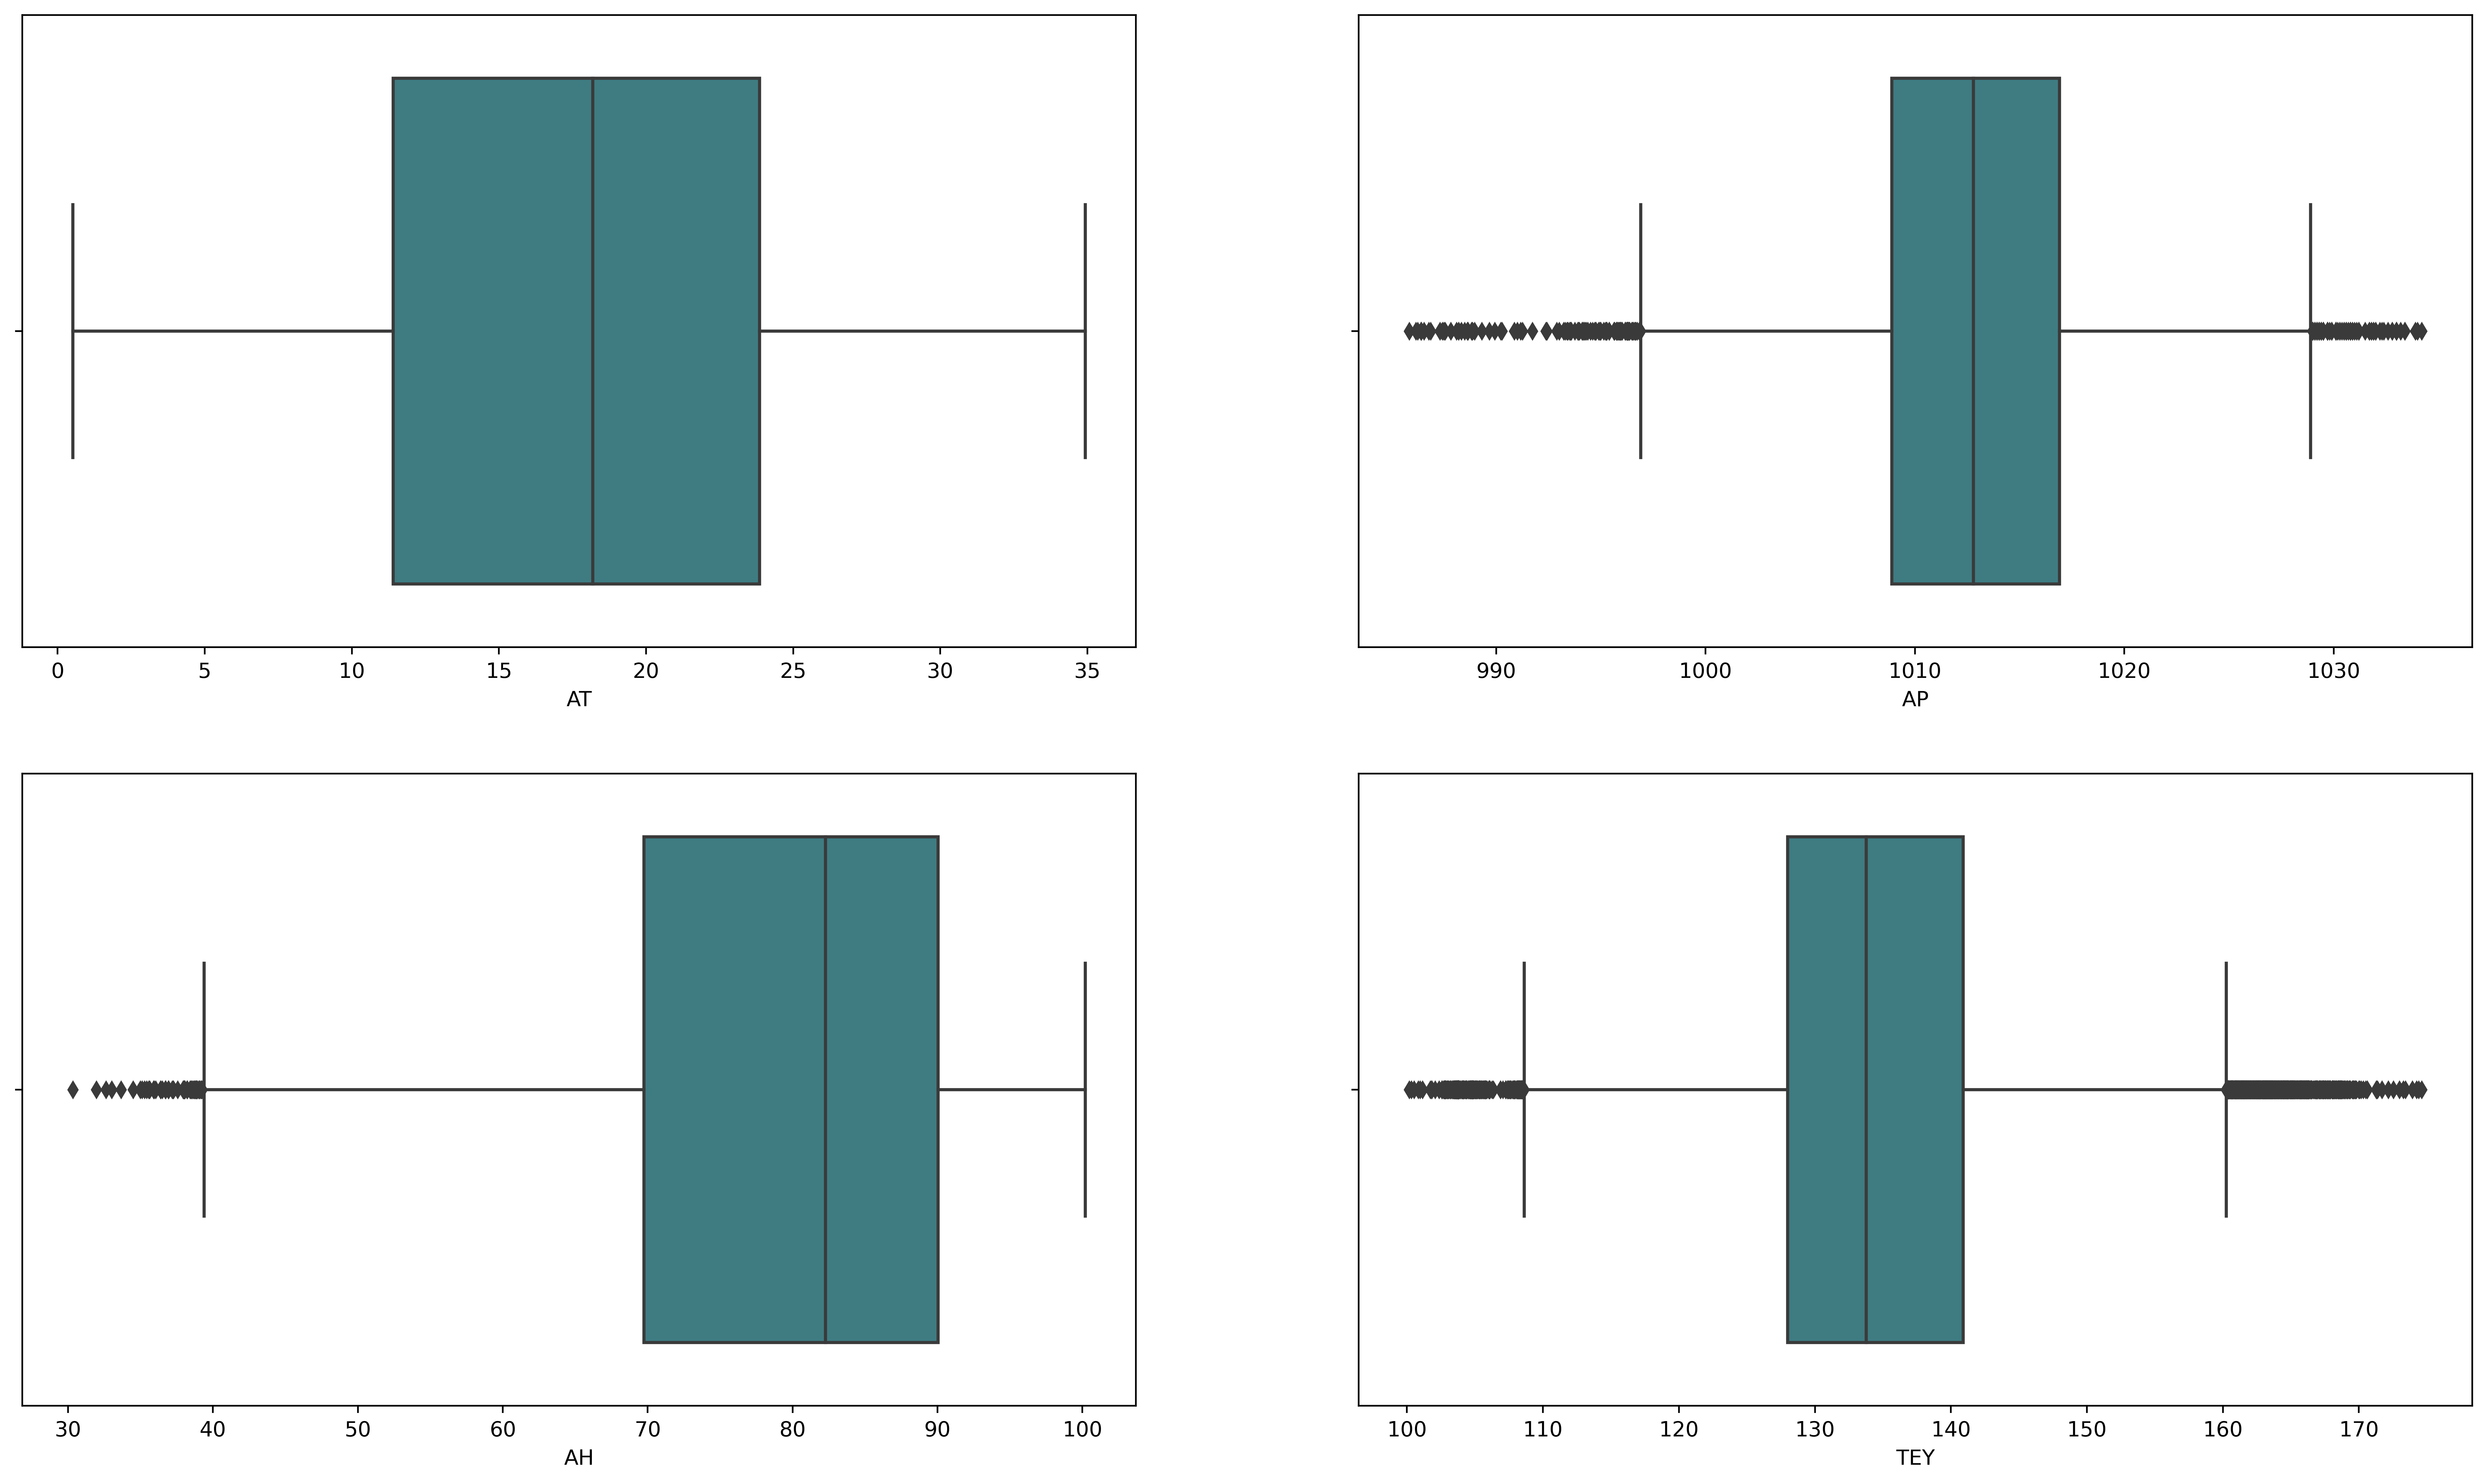

In [12]:
# Outlier detection
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12),dpi=500)
sns.boxplot(x='AT',data=data,palette='crest',ax=axes[0,0])
sns.boxplot(x='AP',data=data,palette='crest',ax=axes[0,1])
sns.boxplot(x='AH',data=data,palette='crest',ax=axes[1,0])
sns.boxplot(x='TEY',data=data,palette='crest',ax=axes[1,1])
plt.show()

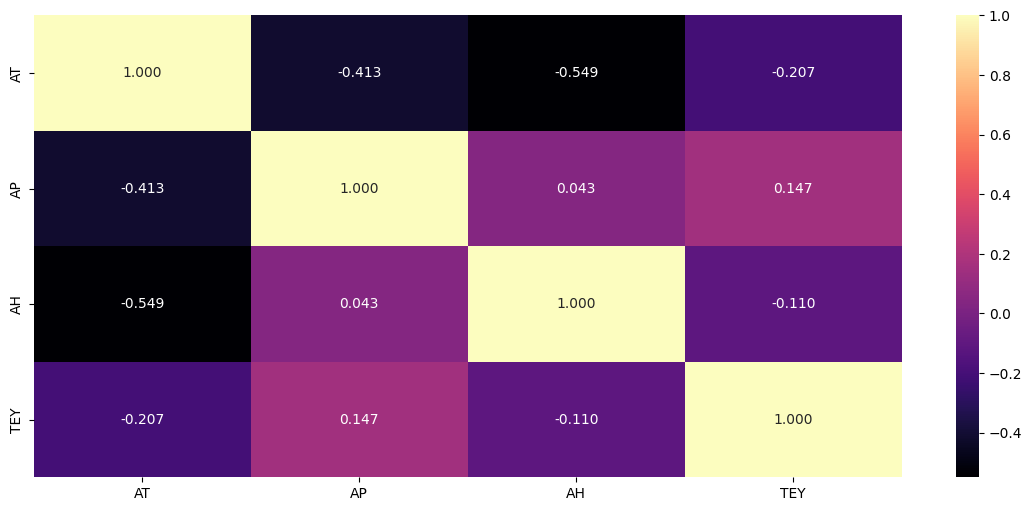

In [13]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(data.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [14]:
#Feature Analysis

from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [15]:
# Splitting the data into train and test
X =data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)


In [16]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [18]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [19]:
len(xtrain_scale)

10527

In [22]:
scores = fit.scores_
features = fit.transform(X)

In [23]:
score_data = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_data.sort_values(by="Score", ascending=False, inplace=True)
score_data

,Score,Feature
0,0.412149,AT
1,0.137367,AP
2,0.097685,AH


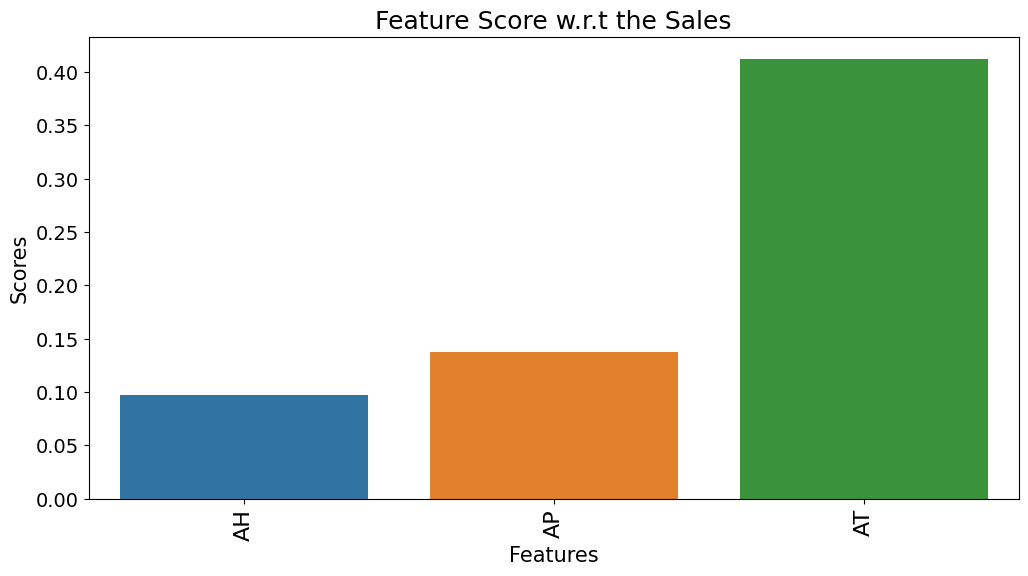

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_data , order=score_data.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [26]:
#Neural network modelling
# create model
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

# Fit the model
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 5s 22ms/step - loss: 0.0798 - mse: 0.0798 - mae: 0.2193 - val_loss: 0.0459 - val_mse: 0.0459 - val_mae: 0.1529
Epoch 2/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0465 - mse: 0.0465 - mae: 0.1559 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1542
Epoch 3/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1534 - val_loss: 0.0453 - val_mse: 0.0453 - val_mae: 0.1525
Epoch 4/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0458 - mse: 0.0458 - mae: 0.1529 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1516
Epoch 5/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1532 - val_loss: 0.0443 - val_mse: 0.0443 - val_mae: 0.1485
Epoch 6/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0450 - mse: 0.0450 - mae: 0.1508 - val_loss: 0.0440 - val_mse: 0.0440 - val_mae: 0.1484
Epoch 7/100
48/4

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Define the first model architecture
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the first model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the first model to the training data
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 [==============================] - 4s 5ms/step - loss: 253.5103 - mae: 12.2853 - val_loss: 240.6234 - val_mae: 12.1103
Epoch 2/50
658/658 [==============================] - 2s 3ms/step - loss: 240.6257 - mae: 12.1758 - val_loss: 235.6846 - val_mae: 12.1705
Epoch 3/50
658/658 [==============================] - 2s 2ms/step - loss: 234.8915 - mae: 12.0866 - val_loss: 232.7119 - val_mae: 12.0326
Epoch 4/50
658/658 [==============================] - 2s 3ms/step - loss: 234.3293 - mae: 12.1554 - val_loss: 229.6442 - val_mae: 11.9576
Epoch 5/50
658/658 [==============================] - 2s 2ms/step - loss: 232.4821 - mae: 12.0835 - val_loss: 240.1249 - val_mae: 12.5333
Epoch 6/50
658/658 [==============================] - 2s 3ms/step - loss: 232.7668 - mae: 12.1068 - val_loss: 260.8592 - val_mae: 13.0342
Epoch 7/50
658/658 [==============================] - 2s 2ms/step - loss: 233.4341 - mae: 12.1327 - val_loss: 243.2029 - val_mae: 12.4401
Epoch 8/50
658/658 [==============

In [30]:
# Define the second model architecture
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the second model
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

# Fit the second model to the training data
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
329/329 [==============================] - 4s 9ms/step - loss: 13.5439 - mse: 435.5980 - val_loss: 11.4996 - val_mse: 247.7594
Epoch 2/100
329/329 [==============================] - 4s 12ms/step - loss: 11.3861 - mse: 244.6969 - val_loss: 11.4549 - val_mse: 244.7233
Epoch 3/100
329/329 [==============================] - 2s 7ms/step - loss: 11.4707 - mse: 243.7600 - val_loss: 11.2668 - val_mse: 242.7968
Epoch 4/100
329/329 [==============================] - 3s 8ms/step - loss: 11.4149 - mse: 243.5460 - val_loss: 11.2633 - val_mse: 242.3607
Epoch 5/100
329/329 [==============================] - 2s 5ms/step - loss: 11.4669 - mse: 243.4144 - val_loss: 11.2677 - val_mse: 241.4741
Epoch 6/100
329/329 [==============================] - 1s 3ms/step - loss: 11.4337 - mse: 241.9182 - val_loss: 11.5088 - val_mse: 244.1423
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 11.3635 - mse: 241.1403 - val_loss: 11.4510 - val_mse: 242.2560
Epoch 8/100
329/329 [=====

In [31]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# now predict the both the model
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 1s 3ms/step


In [33]:
y_pred1 = model1.predict(xtest_scale)

141/141 [==============================] - 1s 3ms/step


In [34]:
y_pred2 = model2.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [35]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [36]:
hist_data = pd.DataFrame(hist.history)
hist_data["epoch"]=hist.epoch
hist_data.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.039850,0.039850,0.159351,0.039803,0.039803,0.159080,95
96,0.039978,0.039978,0.159947,0.040416,0.040416,0.160680,96
97,0.040374,0.040374,0.160445,0.039872,0.039872,0.159074,97
98,0.040424,0.040424,0.160937,0.039712,0.039712,0.158565,98
99,0.039854,0.039854,0.159745,0.040353,0.040353,0.160469,99


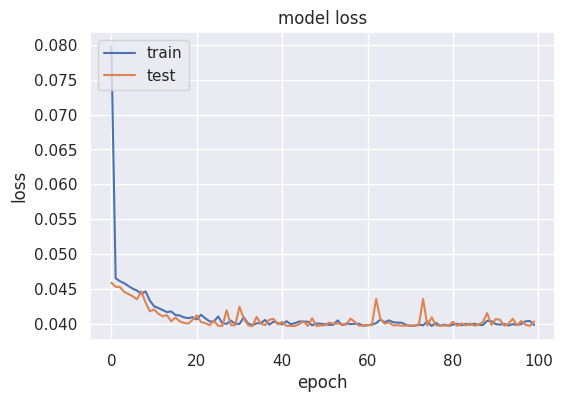

In [37]:
#Visualising
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

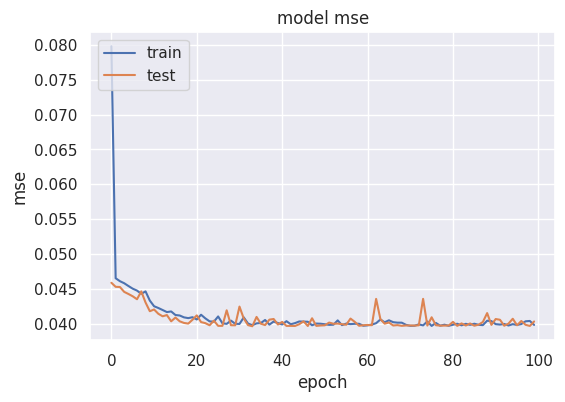

In [38]:
# summarize history for loss

plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()